# Feature engineering

In [50]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [51]:
DATASET_DIR = "dataset" + os.sep

In [52]:
merged_df = pd.read_csv(DATASET_DIR + "merge_clean_v1.csv", parse_dates=["date"])
cyclist_df = pd.read_csv(DATASET_DIR + "cyclist_clean_v1.csv")
stages_df = pd.read_csv(DATASET_DIR + "stages_clean_v1.csv", parse_dates=["date"])

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589771 entries, 0 to 589770
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589771 non-null  object        
 1   points             589771 non-null  int64         
 2   length             589771 non-null  float64       
 3   climb_total        442772 non-null  float64       
 4   profile            475349 non-null  float64       
 5   startlist_quality  589771 non-null  int64         
 6   date               589771 non-null  datetime64[ns]
 7   position           589771 non-null  int64         
 8   cyclist            589771 non-null  object        
 9   cyclist_age        589658 non-null  float64       
 10  delta              589771 non-null  int64         
 11  race               589771 non-null  object        
 12  year               589771 non-null  int64         
 13  stage              589771 non-null  object  

In [54]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   object 
 1   name         6095 non-null   object 
 2   birth_year   6084 non-null   float64
 3   weight       3134 non-null   float64
 4   height       3134 non-null   float64
 5   nationality  6095 non-null   object 
dtypes: float64(3), object(3)
memory usage: 285.8+ KB


In [55]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5281 entries, 0 to 5280
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   int64         
 5   length             5281 non-null   int64         
 6   climb_total        3067 non-null   float64       
 7   profile            3326 non-null   float64       
 8   startlist_quality  5281 non-null   int64         
 9   year               5281 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 412.7+ KB


## Feature creation

### Seasons

For features engineering we can discretize for example the date to extract the season (spring, winter ...) while for features novel we can create new feature to analyze in which seasons and in which years the cyclist is more active.

In [56]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"


# Apply the function to the date column to create a new season column
merged_df["season"] = merged_df["date"].apply(get_season)
stages_df["season"] = stages_df["date"].apply(get_season)
stages_df.tail(10)

,_url,stage,race,date,points,length,climb_total,profile,startlist_quality,year,season
5271,world-championship/2013/result,result,world-championship,2013-09-29,350,272200,3923.0,2.0,1630,2013,Fall
5272,world-championship/2014/result,result,world-championship,2014-09-28,350,254800,4520.0,2.0,1535,2014,Fall
5273,world-championship/2015/result,result,world-championship,2015-09-27,350,261400,2089.0,3.0,1353,2015,Fall
5274,world-championship/2016/result,result,world-championship,2016-10-16,350,257300,401.0,1.0,998,2016,Fall
5275,world-championship/2017/result,result,world-championship,2017-09-24,350,267500,NaN,2.0,1327,2017,Fall
5276,world-championship/2018/result,result,world-championship,2018-09-30,350,258000,5020.0,4.0,1374,2018,Fall
5277,world-championship/2019/result,result,world-championship,2019-09-29,350,260700,3220.0,2.0,1443,2019,Fall
5278,world-championship/2020/result,result,world-championship,2020-09-27,350,258200,4662.0,2.0,1008,2020,Fall
5279,world-championship/2021/result,result,world-championship,2021-09-26,350,268300,2250.0,2.0,1357,2021,Fall
5280,world-championship/2022/result,result,world-championship,2022-09-25,350,266900,4167.0,2.0,1052,2022,Fall


### Aggregated columns (cyclists)

In [57]:
cyclist_df["avg_pos"] = merged_df.groupby("cyclist")["position"].transform("mean")
cyclist_df["num_races"] = merged_df.groupby("cyclist")["race"].transform("count")

### Body density

In [58]:
cyclist_df["BMI"] = cyclist_df["weight"] / (cyclist_df["height"] / 100) ** 2
merged_df["BMI"] = merged_df["weight"] / (merged_df["height"] / 100) ** 2

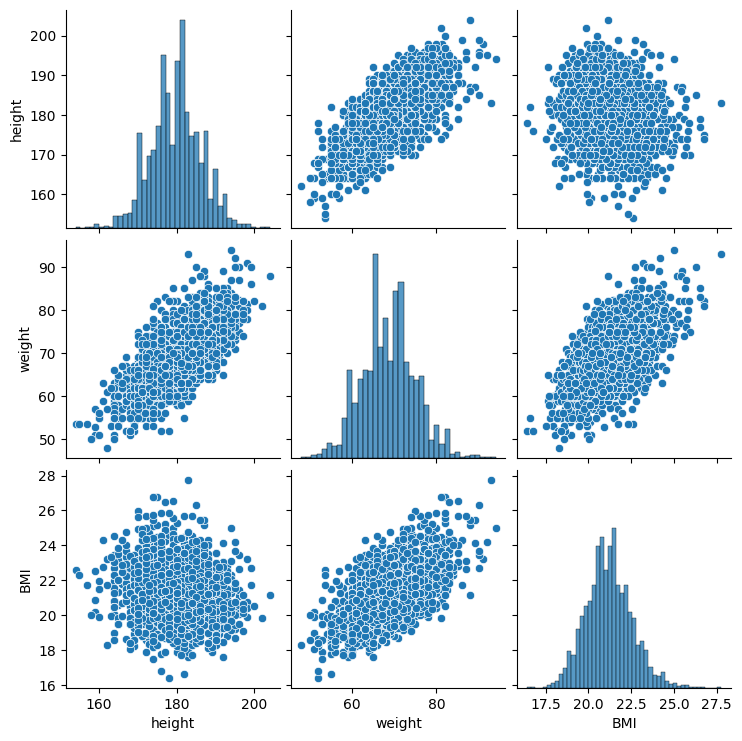

In [59]:
sns.pairplot(cyclist_df[["height", "weight", "BMI"]])

<Axes: >

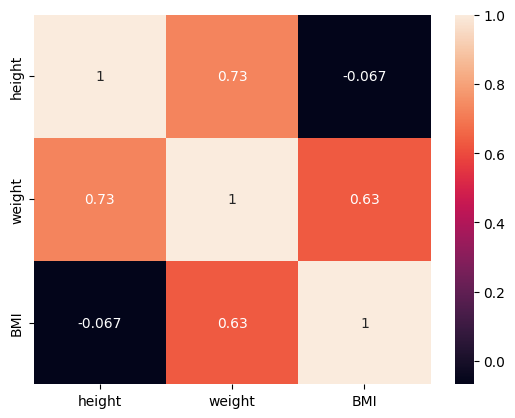

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cyclist_df[["height", "weight", "BMI"]])
scaled_df = pd.DataFrame(scaled_data, columns=["height", "weight", "BMI"])


correlation_matrix = scaled_df[["height", "weight", "BMI"]].corr()
sns.heatmap(correlation_matrix, annot=True)

Since weight higly correlated with both, I remove it

In [61]:
cyclist_df.drop(columns=["weight"], inplace=True)
merged_df.drop(columns=["weight"], inplace=True)

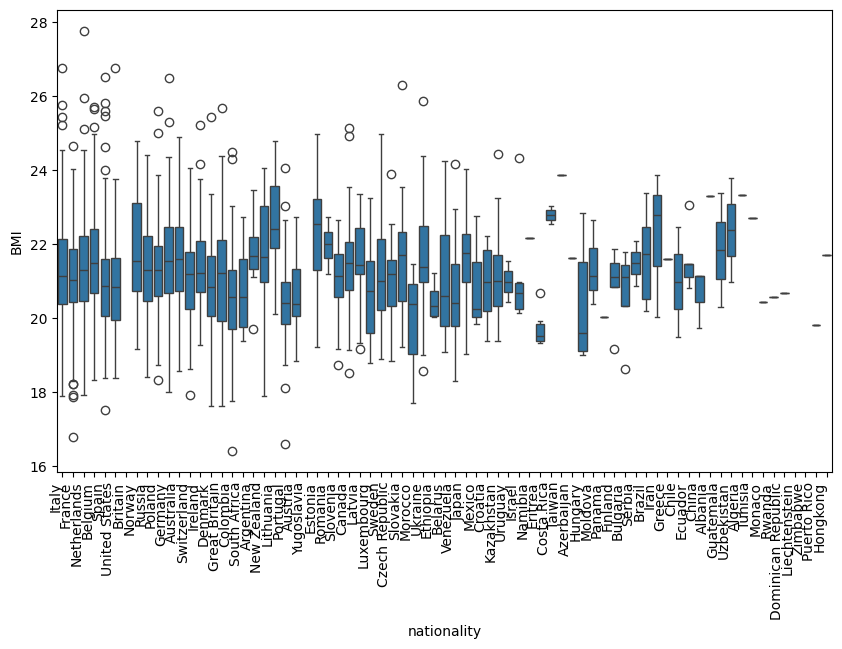

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="nationality", y="BMI", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.show()

### Continent

Getting continent of each cyclist

In [63]:
countries = cyclist_df.nationality.unique()

In [64]:
import pycountry_convert as pc


def get_continent(country_name):
    if country_name == "Yugoslavia":
        return "Europe"
    elif country_name == "Hongkong":
        return "Asia"
    elif country_name == "Britain":
        return "Europe"

    # print(country_name)
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    # print(f"{country_name} is in {country_continent_name}")
    return country_continent_name


cyclist_df["continent"] = cyclist_df["nationality"].apply(get_continent)
merged_df["continent"] = merged_df["nationality"].apply(get_continent)
cyclist_df.head()

,_url,name,birth_year,height,nationality,avg_pos,num_races,BMI,continent
0,bruno-surra,Bruno Surra,1964.0,NaN,Italy,16.092210,629,NaN,Europe
1,gerard-rue,Gérard Rué,1965.0,182.0,France,48.151292,271,22.340297,Europe
2,jan-maas,Jan Maas,1996.0,189.0,Netherlands,47.239726,146,19.316369,Europe
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,192.0,Belgium,16.145833,48,21.158854,Europe
4,jose-felix-parra,José Félix Parra,1997.0,171.0,Spain,33.248276,145,18.809206,Europe


In [65]:
cyclist_df.continent.unique()
cyclist_df[cyclist_df["continent"].isna() & cyclist_df["nationality"].notna()]

,_url,name,birth_year,height,nationality,avg_pos,num_races,BMI,continent


### Aggregated features (stages)

In [66]:
stages_df["count_by_url"] = merged_df.groupby("_url")["cyclist"].transform("count")

stages_df["avg_delta_by_url"] = merged_df.groupby("_url")["delta"].transform("mean")
stages_df["max_delta_by_url"] = merged_df.groupby("_url")["delta"].transform("max")

stages_df["avg_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("mean")
stages_df["max_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("max")
stages_df["min_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("min")
print(stages_df)

                                _url   stage                race       date  \
0       amstel-gold-race/1970/result  result    amstel-gold-race 1970-04-25   
1       amstel-gold-race/1971/result  result    amstel-gold-race 1971-03-28   
2       amstel-gold-race/1972/result  result    amstel-gold-race 1972-03-26   
3       amstel-gold-race/1973/result  result    amstel-gold-race 1973-04-07   
4       amstel-gold-race/1974/result  result    amstel-gold-race 1974-04-13   
...                              ...     ...                 ...        ...   
5276  world-championship/2018/result  result  world-championship 2018-09-30   
5277  world-championship/2019/result  result  world-championship 2019-09-29   
5278  world-championship/2020/result  result  world-championship 2020-09-27   
5279  world-championship/2021/result  result  world-championship 2021-09-26   
5280  world-championship/2022/result  result  world-championship 2022-09-25   

      points  length  climb_total  profile  startli

<Axes: >

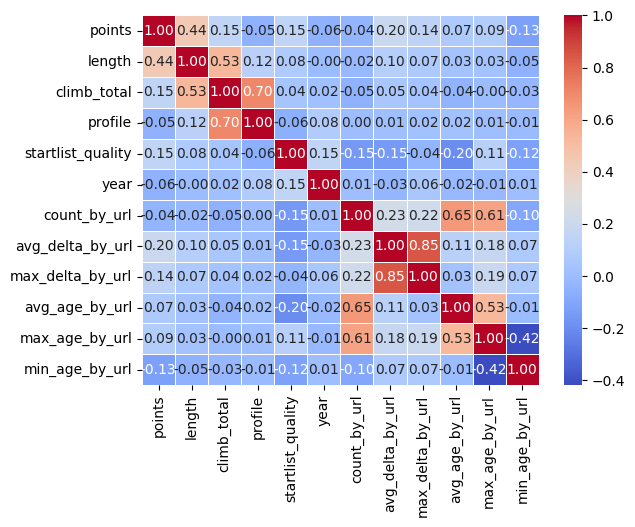

In [67]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stages_df.select_dtypes("number"))
scaled_df = pd.DataFrame(scaled_data, columns=stages_df.select_dtypes("number").columns)

corr_matrix = scaled_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Features aggregated belonging to same table are always correlated to the others. We can drop those highly correlated and so keep only aggregated features beloning to different tables

In [68]:
stages_df.drop(
    columns=["max_age_by_url", "count_by_url", "max_delta_by_url"], inplace=True
)

<Axes: >

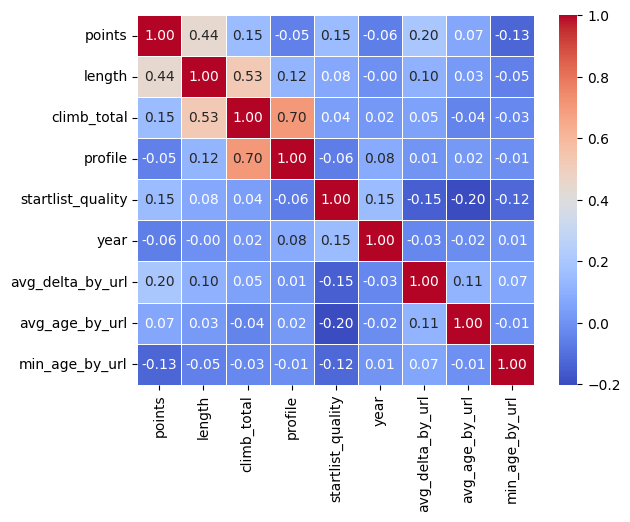

In [69]:
m = stages_df.select_dtypes("number").corr()
sns.heatmap(m, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

### Plots distributions for new features


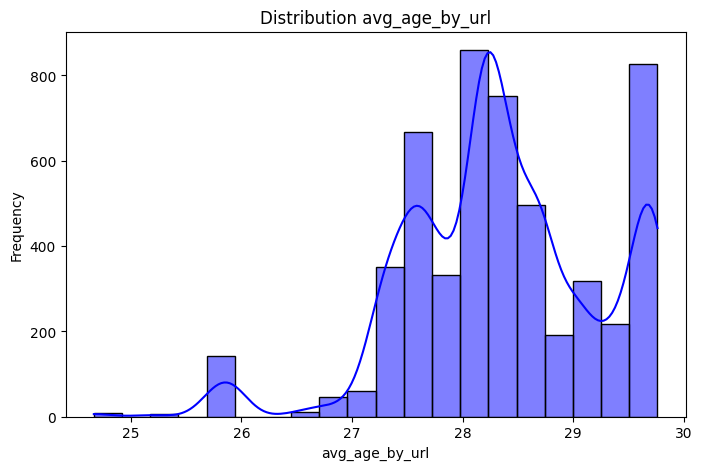

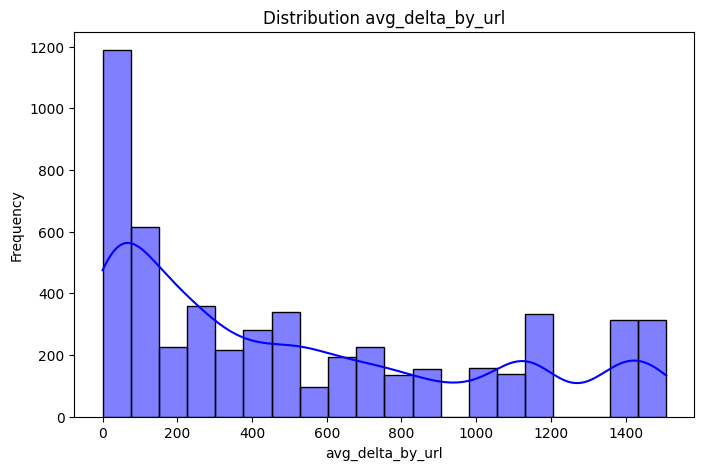

In [70]:
for column in ["avg_age_by_url", "avg_delta_by_url"]:
    plt.figure(figsize=(8, 5))
    sns.histplot(stages_df[column], kde=True, color="blue", bins=20)
    plt.title(f"Distribution {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### Saving before anomaly detection

In [71]:
cyclist_df.to_csv(DATASET_DIR + "cyclist_clean_v2.csv", index=False)
merged_df.to_csv(DATASET_DIR + "merge_clean_v2.csv", index=False)
stages_df.to_csv(DATASET_DIR + "stages_clean_v2.csv", index=False)

## Anomaly Detection

### Cyclists

#### Outlier detection based on nationalities

In [72]:
# considering IQR to remove outliers
# The IQR is done grouping by nation as a first tentative

# threshold for which is ok to do outlier detection based on nationality
amount_threshold = 5

nationalities = cyclist_df.groupby("nationality")["_url"].size()
nationalities = nationalities[nationalities > amount_threshold]

filtered_cyclist_df = cyclist_df[cyclist_df["nationality"].isin(nationalities.index)]

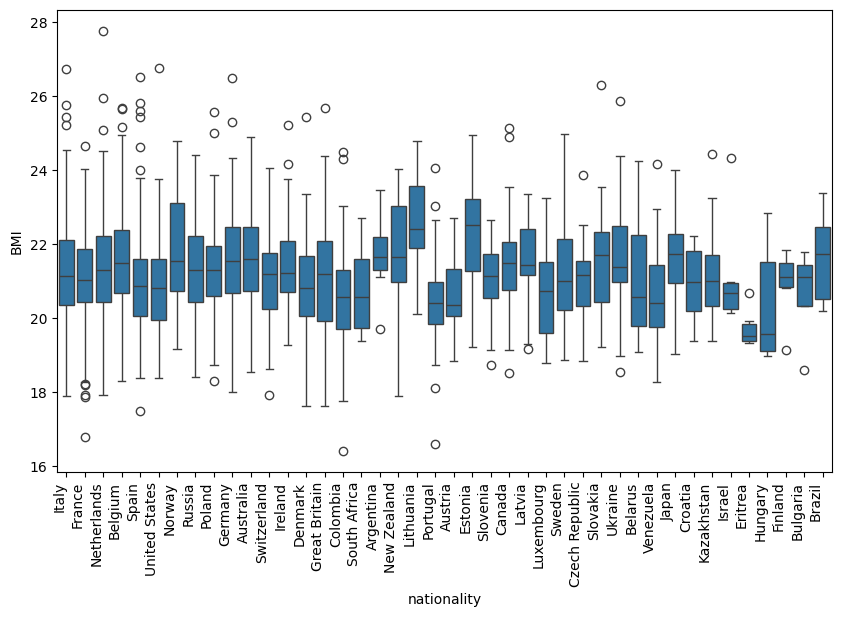

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="nationality", y="BMI", data=filtered_cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.show()

#### Outlier detection based on general distribution

In [74]:
Q1 = cyclist_df[["height", "BMI"]].quantile(0.25)
Q3 = cyclist_df[["height", "BMI"]].quantile(0.75)
IQR = Q3 - Q1
mask = (cyclist_df[["height", "BMI"]] > (Q1 - 1.5 * IQR)) & (
    cyclist_df[["height", "BMI"]] < (Q3 + 1.5 * IQR)
)
cyclist_no_outliers_df = cyclist_df[mask.all(axis=1)]
cyclist_no_outliers_df

,_url,name,birth_year,height,nationality,avg_pos,num_races,BMI,continent
1,gerard-rue,Gérard Rué,1965.0,182.0,France,48.151292,271,22.340297,Europe
2,jan-maas,Jan Maas,1996.0,189.0,Netherlands,47.239726,146,19.316369,Europe
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,192.0,Belgium,16.145833,48,21.158854,Europe
4,jose-felix-parra,José Félix Parra,1997.0,171.0,Spain,33.248276,145,18.809206,Europe
5,manuel-penalver,Manuel Peñalver,1998.0,177.0,Spain,29.435484,62,21.385936,Europe
...,...,...,...,...,...,...,...,...,...
6086,santos-gonzalez,Santos González,1973.0,179.0,Spain,100.754098,366,21.847009,Europe
6087,johannes-adamietz,Johannes Adamietz,1998.0,174.0,Germany,100.103286,213,20.147972,Europe
6091,inigo-elosegui,Iñigo Elosegui,1998.0,188.0,Spain,80.742149,605,21.220009,Europe
6093,jackson-rodriguez,Jackson Rodríguez,1985.0,170.0,Venezuela,48.247059,595,20.069204,South America


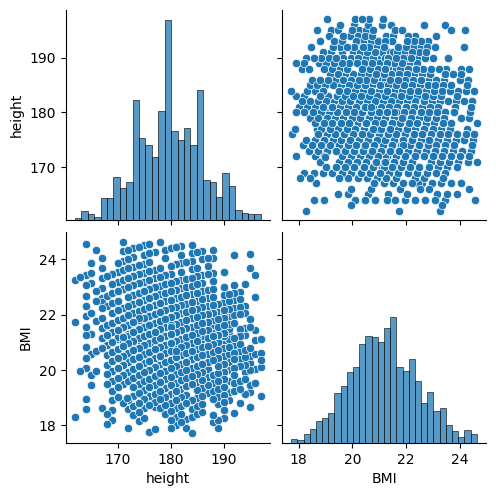

In [75]:
sns.pairplot(cyclist_no_outliers_df[["height", "BMI"]])

<Axes: ylabel='BMI'>

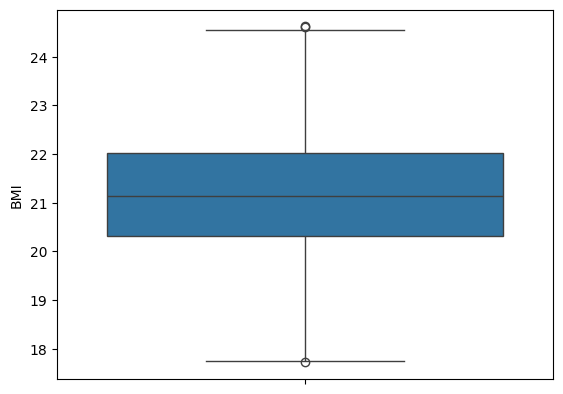

In [76]:
sns.boxplot(cyclist_no_outliers_df["BMI"])

#### Outlier detection based on continent

In [77]:
non_null_counts = cyclist_df.groupby("continent").apply(lambda x: x.notnull().sum())
non_null_counts

/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805/701037702.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_null_counts = cyclist_df.groupby("continent").apply(lambda x: x.notnull().sum())


,_url,name,birth_year,height,nationality,avg_pos,num_races,BMI,continent
continent,,,,,,,,,
Africa,47,47,47,38,47,47,47,38,47
Asia,81,81,81,68,81,81,81,68,81
Europe,5348,5348,5338,2632,5348,5348,5348,2632,5348
North America,205,205,205,136,205,205,205,136,205
Oceania,165,165,165,134,165,165,165,134,165
South America,249,249,248,126,249,249,249,126,249


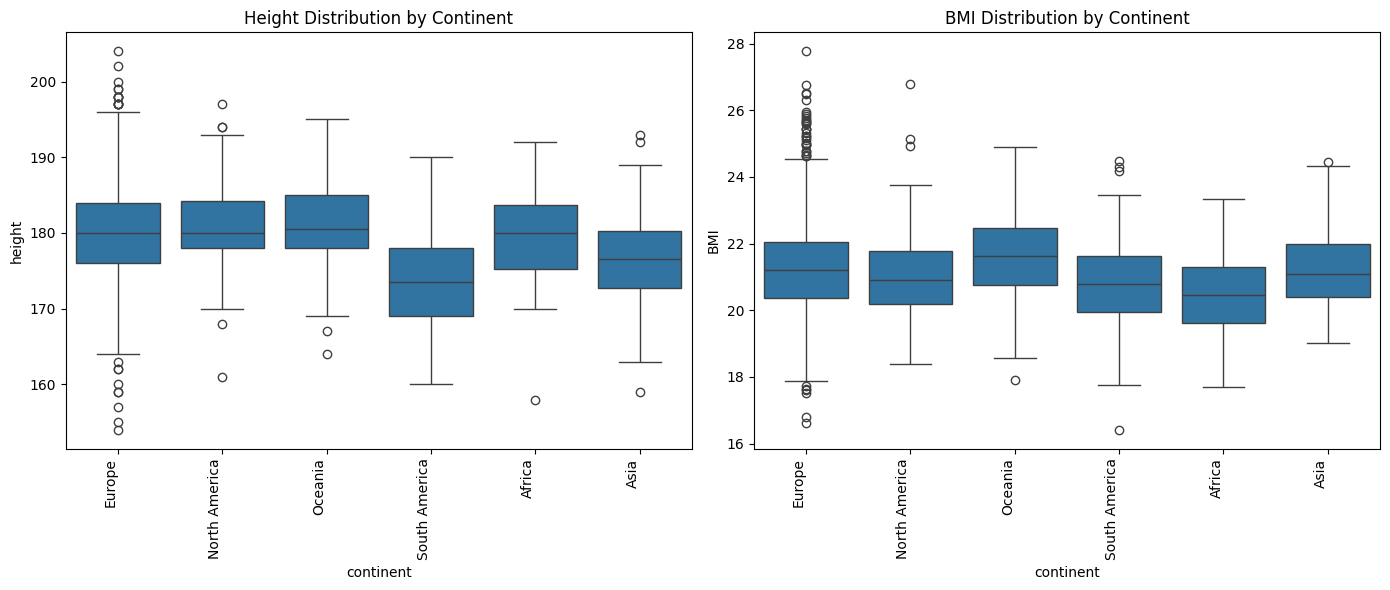

In [78]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="continent", y="height", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Height Distribution by Continent")


plt.subplot(1, 2, 2)
sns.boxplot(x="continent", y="BMI", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("BMI Distribution by Continent")

plt.tight_layout()
plt.show()

In [79]:
# Remove outliers for height by continent
def iqr_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    mask = (group[column] >= (Q1 - 1.5 * IQR)) & (group[column] <= (Q3 + 1.5 * IQR))
    return group[mask]


cyclist_df_no_outliers_by_continent = cyclist_df.copy()

while True:
    old_shape = cyclist_df_no_outliers_by_continent.shape[0]
    cyclist_df_no_outliers_by_continent = (
        cyclist_df_no_outliers_by_continent.groupby("continent")
        .apply(lambda x: iqr_outliers(x, "height"))
        .reset_index(drop=True)
    )
    if cyclist_df_no_outliers_by_continent.shape[0] == old_shape:
        break

while True:
    old_shape = cyclist_df_no_outliers_by_continent.shape[0]
    cyclist_df_no_outliers_by_continent = (
        cyclist_df_no_outliers_by_continent.groupby("continent")
        .apply(lambda x: iqr_outliers(x, "BMI"))
        .reset_index(drop=True)
    )
    if cyclist_df_no_outliers_by_continent.shape[0] == old_shape:
        break

/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805/1172385823.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "height"))
/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805/1172385823.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "height"))
/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805

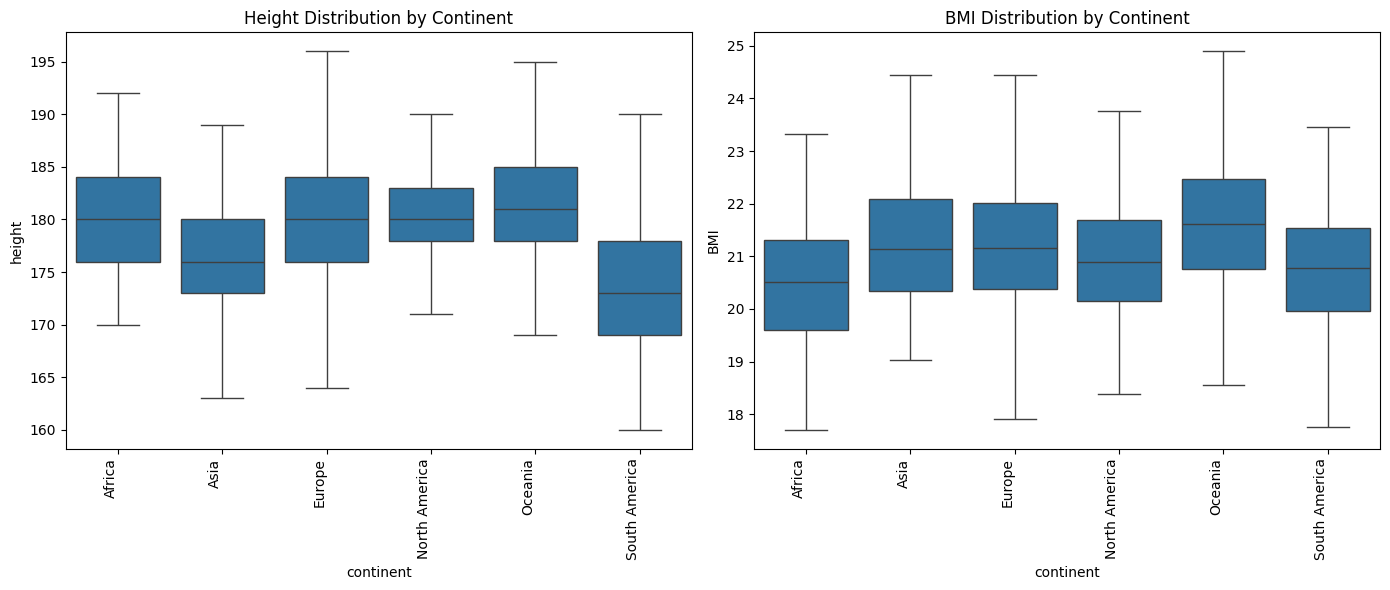

In [80]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="continent", y="height", data=cyclist_df_no_outliers_by_continent)
plt.xticks(rotation=90, ha="right")
plt.title("Height Distribution by Continent")


plt.subplot(1, 2, 2)
sns.boxplot(x="continent", y="BMI", data=cyclist_df_no_outliers_by_continent)
plt.xticks(rotation=90, ha="right")
plt.title("BMI Distribution by Continent")

plt.tight_layout()
plt.show()

In [81]:
cyclist_df = cyclist_df_no_outliers_by_continent

In [82]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         3039 non-null   object 
 1   name         3039 non-null   object 
 2   birth_year   3039 non-null   float64
 3   height       3039 non-null   float64
 4   nationality  3039 non-null   object 
 5   avg_pos      3039 non-null   float64
 6   num_races    3039 non-null   int64  
 7   BMI          3039 non-null   float64
 8   continent    3039 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 213.8+ KB


## Stages

### Outlier detection for profile based on climb total

<Axes: xlabel='profile', ylabel='climb_total'>

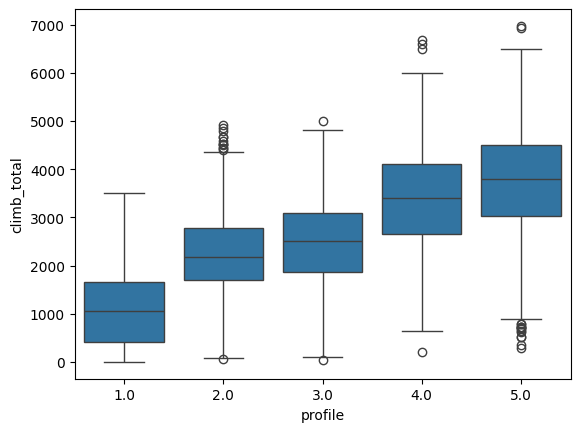

In [83]:
sns.boxplot(x="profile", y="climb_total", data=stages_df)

In [84]:
stages_df_no_outliers_profile = stages_df.copy()
while True:
    old_shape = stages_df_no_outliers_profile.shape[0]
    stages_df_no_outliers_profile = (
        stages_df_no_outliers_profile.groupby("profile")
        .apply(lambda x: iqr_outliers(x, "climb_total"))
        .reset_index(drop=True)
    )
    if stages_df_no_outliers_profile.shape[0] == old_shape:
        break

/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805/3744823321.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "climb_total"))
/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykernel_32805/3744823321.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "climb_total"))
/var/folders/7r/qvcjkyfd0k59hjv_yfvc3hj00000gn/T/ipykern

<Axes: xlabel='profile', ylabel='climb_total'>

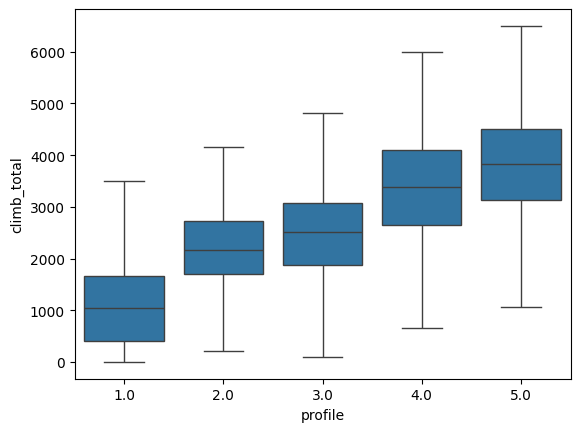

In [85]:
sns.boxplot(x="profile", y="climb_total", data=stages_df_no_outliers_profile)

In [86]:
stages_df_no_outliers_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   object        
 1   stage              3021 non-null   object        
 2   race               3021 non-null   object        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   int64         
 5   length             3021 non-null   int64         
 6   climb_total        3021 non-null   float64       
 7   profile            3021 non-null   float64       
 8   startlist_quality  3021 non-null   int64         
 9   year               3021 non-null   int64         
 10  season             3021 non-null   object        
 11  avg_delta_by_url   3021 non-null   float64       
 12  avg_age_by_url     3021 non-null   float64       
 13  min_age_by_url     3021 non-null   float64       
dtypes: datet

In [87]:
stages_df = stages_df_no_outliers_profile

### Merged df

### Conform to changes in other dfs

In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589771 entries, 0 to 589770
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589771 non-null  object        
 1   points             589771 non-null  int64         
 2   length             589771 non-null  float64       
 3   climb_total        442772 non-null  float64       
 4   profile            475349 non-null  float64       
 5   startlist_quality  589771 non-null  int64         
 6   date               589771 non-null  datetime64[ns]
 7   position           589771 non-null  int64         
 8   cyclist            589771 non-null  object        
 9   cyclist_age        589658 non-null  float64       
 10  delta              589771 non-null  int64         
 11  race               589771 non-null  object        
 12  year               589771 non-null  int64         
 13  stage              589771 non-null  object  

In [89]:
stages_to_merge = stages_df[
    [
        "_url",
        "stage",
        "race",
        "date",
        "points",
        "length",
        "climb_total",
        "profile",
        "startlist_quality",
        "year",
        "season",
    ]
]
stages_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   object        
 1   stage              3021 non-null   object        
 2   race               3021 non-null   object        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   int64         
 5   length             3021 non-null   int64         
 6   climb_total        3021 non-null   float64       
 7   profile            3021 non-null   float64       
 8   startlist_quality  3021 non-null   int64         
 9   year               3021 non-null   int64         
 10  season             3021 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 259.7+ KB


In [90]:
cyclist_to_merge = cyclist_df[
    ["_url", "name", "birth_year", "height", "nationality", "continent", "BMI"]
]
cyclist_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         3039 non-null   object 
 1   name         3039 non-null   object 
 2   birth_year   3039 non-null   float64
 3   height       3039 non-null   float64
 4   nationality  3039 non-null   object 
 5   continent    3039 non-null   object 
 6   BMI          3039 non-null   float64
dtypes: float64(3), object(4)
memory usage: 166.3+ KB


In [91]:
merged_df = merged_df.merge(
    stages_to_merge, on="_url", how="inner", suffixes=("_old", "")
)
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if "_old" in col])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436822 entries, 0 to 436821
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               436822 non-null  object        
 1   position           436822 non-null  int64         
 2   cyclist            436822 non-null  object        
 3   cyclist_age        436722 non-null  float64       
 4   delta              436822 non-null  int64         
 5   birth_year         436786 non-null  float64       
 6   height             368394 non-null  float64       
 7   nationality        436822 non-null  object        
 8   BMI                368394 non-null  float64       
 9   continent          436822 non-null  object        
 10  stage              436822 non-null  object        
 11  race               436822 non-null  object        
 12  date               436822 non-null  datetime64[ns]
 13  points             436822 non-null  int64   

In [ ]:
merged_df = merged_df.merge(
    cyclist_df, left_on="cyclist", right_on="_url", how="inner", suffixes=("_old", "")
)
merged_df.drop(columns=["_url", "name"], inplace=True)
merged_df.rename(columns={"_url_old": "_url"}, inplace=True)
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if "_old" in col])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359333 entries, 0 to 359332
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359333 non-null  object        
 1   position           359333 non-null  int64         
 2   cyclist            359333 non-null  object        
 3   cyclist_age        359333 non-null  float64       
 4   delta              359333 non-null  int64         
 5   stage              359333 non-null  object        
 6   race               359333 non-null  object        
 7   date               359333 non-null  datetime64[ns]
 8   points             359333 non-null  int64         
 9   length             359333 non-null  int64         
 10  climb_total        359333 non-null  float64       
 11  profile            359333 non-null  float64       
 12  startlist_quality  359333 non-null  int64         
 13  year               359333 non-null  int64   

In [95]:
merged_df.drop(columns=["num_races", "avg_pos"], inplace=True)

In [98]:
merged_df = merged_df.convert_dtypes()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359333 entries, 0 to 359332
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359333 non-null  string        
 1   position           359333 non-null  Int64         
 2   cyclist            359333 non-null  string        
 3   cyclist_age        359333 non-null  Int64         
 4   delta              359333 non-null  Int64         
 5   stage              359333 non-null  string        
 6   race               359333 non-null  string        
 7   date               359333 non-null  datetime64[ns]
 8   points             359333 non-null  Int64         
 9   length             359333 non-null  Int64         
 10  climb_total        359333 non-null  Int64         
 11  profile            359333 non-null  Int64         
 12  startlist_quality  359333 non-null  Int64         
 13  year               359333 non-null  Int64   

## Output datasets

In [99]:
cyclist_df.to_csv(DATASET_DIR + "cyclist_clean_v2-AD.csv", index=False)
merged_df.to_csv(DATASET_DIR + "merge_clean_v2-AD.csv", index=False)
stages_df.to_csv(DATASET_DIR + "stages_clean_v2-AD.csv", index=False)